# Project HR

Predict attrition of your valuable employees

[IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("./data/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
df.shape # Attrition, PerformanceRating

(1470, 35)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
# df.isnull().sum().plot(kind="bar", title="Missing Values")
import plotly.graph_objects as go
fig = go.Figure([go.Bar(
                x=df.isnull().sum().index, 
                y=df.isnull().sum())
                ])
fig.update_layout(title='NaN values by column', width=1200)
fig.show()

In [84]:
for i in df:
    print('*************************************************************')
    print('Column name', i, '      column type', df[i].dtypes)
    print(df[i].unique())

*************************************************************
Column name Age       column type int64
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
*************************************************************
Column name Attrition       column type object
['Yes' 'No']
*************************************************************
Column name BusinessTravel       column type object
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
*************************************************************
Column name Department       column type object
['Sales' 'Research & Development' 'Human Resources']
*************************************************************
Column name DistanceFromHome       column type int64
[ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
*************************************************************
Column name Education       column type int64
[2 

In [12]:
# drop unneccesary columns: EmployeeNumber, DailyRate
columns_to_drop = ['DailyRate', 'EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']

def removeColumns(columns):
    for i in columns:
        if i in df:
            df.drop(i, inplace=True, axis=1)

removeColumns(columns_to_drop)

In [13]:
df.shape

(1470, 30)

In [14]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [15]:
# get only numerical and analize them
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = df.select_dtypes(include=numerics)

category = df.select_dtypes(include=object)

In [16]:
numeric.iloc[:,:12].head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike
0,41,1,2,2,94,3,2,4,5993,19479,8,11
1,49,8,1,3,61,2,2,2,5130,24907,1,23
2,37,2,2,4,92,2,1,3,2090,2396,6,15
3,33,3,4,4,56,3,1,3,2909,23159,1,11
4,27,2,1,1,40,3,1,2,3468,16632,9,12


# EDA

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
from pylab import *

In [18]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

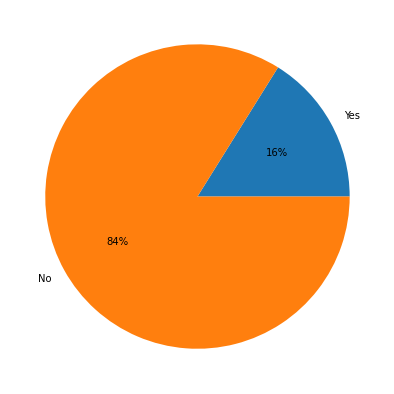

In [19]:
plt.figure(figsize = (7,7))
NO, YES = df['Attrition'].value_counts()[0], df['Attrition'].value_counts()[1]
data = [YES / (NO + YES) * 100, NO / (NO + YES) * 100]
plt.pie(data, labels = ['Yes', 'No'], autopct='%.0f%%')
plt.show()

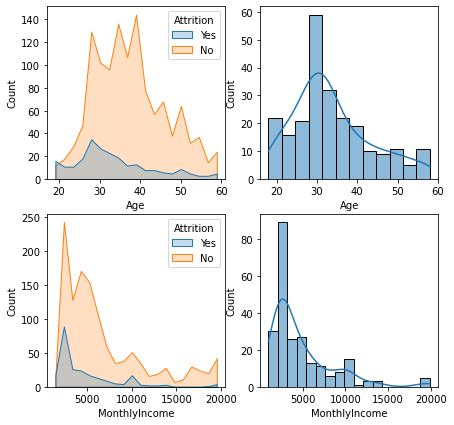

In [20]:
plt.figure(figsize = (7,7))

subplot(2,2,1)
sns.histplot(df, x="Age", hue="Attrition", element="poly")

subplot(2,2,2)
sns.histplot(data=df[df.Attrition == 'Yes'], x="Age", kde=True)

subplot(2,2,3)
sns.histplot(df, x="MonthlyIncome", hue="Attrition", element="poly")

subplot(2,2,4)
sns.histplot(data=df[df.Attrition == 'Yes'], x="MonthlyIncome",  kde=True)

plt.show()


In [21]:
#ax = sns.barplot(x="day", y="total_bill", hue="Gender", data=df)

# Start applying Modeling

In [22]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Plan of attack:

* More plots
* Split
* Tree
* Random
* Adaboots: https://towardsdatascience.com/ensemble-methods-in-machine-learning-what-are-they-and-why-use-them-68ec3f9fef5f
* Ensamble
* 


In [23]:
## Experimental Split data on and on without errors in notebook

# def splitDataset():
#     X = df.copy()
#     y = ''
#     if 'Attrition' in X:
#         y = df.Attrition
#         X.pop('Attrition')
#     return X, y

# X, y = splitDataset()

In [24]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [25]:
y.unique()

array(['Yes', 'No'], dtype=object)

In [26]:
for i in df:
    print('Column name:', i, '\t\t\t\ttype:', df[i].dtypes)

Column name: Age 				type: int64
Column name: Attrition 				type: object
Column name: BusinessTravel 				type: object
Column name: Department 				type: object
Column name: DistanceFromHome 				type: int64
Column name: Education 				type: int64
Column name: EducationField 				type: object
Column name: EnvironmentSatisfaction 				type: int64
Column name: Gender 				type: object
Column name: HourlyRate 				type: int64
Column name: JobInvolvement 				type: int64
Column name: JobLevel 				type: int64
Column name: JobRole 				type: object
Column name: JobSatisfaction 				type: int64
Column name: MaritalStatus 				type: object
Column name: MonthlyIncome 				type: int64
Column name: MonthlyRate 				type: int64
Column name: NumCompaniesWorked 				type: int64
Column name: OverTime 				type: object
Column name: PercentSalaryHike 				type: int64
Column name: PerformanceRating 				type: int64
Column name: RelationshipSatisfaction 				type: int64
Column name: StockOptionLevel 				type: int64
Column 

In [27]:
# select categorical and numerical features
df.select_dtypes(['object']).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [28]:
bustra = pd.get_dummies(X['BusinessTravel'], prefix='BusinessTravel')
bustra.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [29]:
# gender = pd.get_dummies(df.Gender, prefix='Gender')
# job_role = pd.get_dummies(df.JobRole, prefix='JobRole')
# marital_status = pd.get_dummies(df.MaritalStatus, prefix='MaritalStatus') 
# over_time = pd.get_dummies(df.OverTime, prefix='OverTime')
# buss_travel = pd.get_dummies(df.BusinessTravel, prefix='BusinessTravel')
# dept = pd.get_dummies(df.Department, prefix='Department') 
# educ_field = pd.get_dummies(df.EducationField, prefix='EducationField')

# df_onehot = pd.concat([gender, 
#                     job_role, 
#                     marital_status, 
#                     over_time, 
#                     buss_travel, 
#                     dept, 
#                     educ_field, 
#                     df.select_dtypes(['int64'])], axis=1)

def onehot():
    """Encode categorical and combine categorical and numerical in one df"""
    new_list = [df.select_dtypes(['int64'])]
    for i in X.select_dtypes(['object']).columns:
        temp = pd.get_dummies(X[i], prefix=i)
        new_list.append(temp)
    return pd.concat(new_list, axis=1)
    
df_ = onehot()


In [30]:
# ax = sns.heatmap(numeric.iloc[:,:12], annot=True, fmt="d")
df_.shape

(1470, 50)

## LabelBinarizer
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html

* Note: Dont need Binarizer with xgboost classifier. Turn the categorical target to True or False? 

In [31]:
from sklearn import preprocessing
bin = preprocessing.LabelBinarizer()

In [32]:
y = bin.fit_transform(y)
print(np.unique(y), y.shape) # now is a numpy

[0 1] (1470, 1)


# Decision Tree

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(df_, y)


In [34]:
tree_cl1 = DecisionTreeClassifier(random_state=42) 

In [35]:
tree_cl1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [85]:
# test in sample
# very high at first glance, do we have overfitting?
print(
    'accuracy_score', accuracy_score(y_train, tree_cl1.predict(X_train)),'\n',
    'classification_report\n', classification_report(y_train, tree_cl1.predict(X_train)), '\n',
    'confusion matrix\n', confusion_matrix(y_train, tree_cl1.predict(X_train))
)
# We have overfitting
print(
    'accuracy_score: ', accuracy_score(y_test, tree_cl1.predict(X_test)),'\n',
    'classification_report\n', classification_report(y_test, tree_cl1.predict(X_test)), '\n',
    'confusion matrix\n', confusion_matrix(y_test, tree_cl1.predict(X_test))
)

accuracy_score 1.0 
 classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       918
           1       1.00      1.00      1.00       184

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102
 
 confusion matrix
 [[918   0]
 [  0 184]]
accuracy_score:  0.75 
 classification_report
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       315
           1       0.23      0.32      0.27        53

    accuracy                           0.75       368
   macro avg       0.56      0.57      0.56       368
weighted avg       0.79      0.75      0.77       368
 
 confusion matrix
 [[259  56]
 [ 36  17]]


In [38]:
# from sklearn.model_selection import cross_validate
# from sklearn.datasets import  load_iris
# from sklearn.svm import SVC

# iris = load_iris()
# clf = SVC()
# scoring = {'acc': 'accuracy',
#            'prec_macro': 'precision_macro',
#            'rec_micro': 'recall_macro'}
# scores = cross_validate(clf, iris.data, iris.target, scoring=scoring,
#                          cv=5, return_train_score=True)
# print(scores.keys())
# print(scores['test_acc']) 

In [39]:
## agnosctic function for train and test scores for all model classifiers
def scores(cl, X_train, y_train, X_test, y_test, train=True, cv=2): 
    """ render accuracy, classification report and confusion matrix scores for train and test
        in order to compare them
        cl: as classifier (Tree, RandomForest, etc)
    """
    if train:
        print('\n***************************** Training ****************************************************')
        print(f'Accuracy:\t\t {accuracy_score(y_train, cl.predict(X_train))} \n')
        print(f'Classification Report:\n {classification_report(y_train, cl.predict(X_train))}')
        print(f'Confusion Matrix:\n {confusion_matrix(y_train, cl.predict(X_train))}')
        print("******Cross Validation Number:",cv)
        cv_score = cross_val_score(cl, X_train, y_train.ravel(), cv=cv, scoring='accuracy')
        print('Avg accuracy:', np.mean(cv_score))
        print('Accuracy standard dev:', np.std(cv_score))
        
    else:
        print('\n***************************** Testing ****************************************************')
        print(f'Accuracy:\t\t {accuracy_score(y_test, cl.predict(X_test))}')
        print(f'Classification Report:\n {classification_report(y_test, cl.predict(X_test))}')
        print(f'Confusion Matrix:\n {confusion_matrix(y_test, cl.predict(X_test))}')
    


## Bagging
Using Tree Classifier

In [40]:
# pass tree classifier previously created
from sklearn.ensemble import BaggingClassifier
b_clf = BaggingClassifier(
    base_estimator=tree_cl1, 
    n_estimators=100, 
    bootstrap=True, 
    n_jobs=-1, 
    random_state=42)

In [41]:
"""need to use ravel: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 
for example using ravel()
"""
b_clf.fit(X_train, y_train.ravel())

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=100, n_jobs=-1, random_state=42)

In [42]:
scores(b_clf, X_train, y_train, X_test, y_test, train=True, cv=10)
scores(b_clf, X_train, y_train, X_test, y_test, train=False)


***************************** Training ****************************************************
Accuracy:		 1.0 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       918
           1       1.00      1.00      1.00       184

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102

Confusion Matrix:
 [[918   0]
 [  0 184]]
******Cross Validation Number: 10
Avg accuracy: 0.8484684684684686
Accuracy standard dev: 0.023640960491254723

***************************** Testing ****************************************************
Accuracy:		 0.8695652173913043
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       315
           1       0.61      0.26      0.37        53

    accuracy                           0.87       368
   macro avg       0

## RandomForest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train.ravel())

RandomForestClassifier()

In [45]:
scores(rf_clf, X_train, y_train, X_test, y_test, train=True, cv=10)
scores(rf_clf, X_train, y_train, X_test, y_test, train=False)


***************************** Training ****************************************************
Accuracy:		 1.0 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       918
           1       1.00      1.00      1.00       184

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102

Confusion Matrix:
 [[918   0]
 [  0 184]]
******Cross Validation Number: 10
Avg accuracy: 0.8557411957411958
Accuracy standard dev: 0.016224164367238003

***************************** Testing ****************************************************
Accuracy:		 0.8831521739130435
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.94       315
           1       0.86      0.23      0.36        53

    accuracy                           0.88       368
   macro avg       0

In [46]:
rf_clf.feature_importances_


array([0.06369588, 0.04407518, 0.02180717, 0.02778353, 0.04737657,
       0.03033111, 0.02024176, 0.02478915, 0.07948941, 0.04482242,
       0.03329438, 0.03747657, 0.00517391, 0.02158507, 0.03012181,
       0.05326669, 0.02694788, 0.02802769, 0.04083704, 0.02823532,
       0.02327824, 0.02889396, 0.0032807 , 0.0167634 , 0.00986756,
       0.00241624, 0.00752201, 0.00750613, 0.00345244, 0.00788805,
       0.00595485, 0.0092593 , 0.00520803, 0.00882374, 0.008387  ,
       0.00815976, 0.0033509 , 0.0024041 , 0.01100364, 0.0014859 ,
       0.00298955, 0.00087981, 0.00685477, 0.00701567, 0.00800051,
       0.00663131, 0.00858812, 0.01750278, 0.0313348 , 0.02591817])

In [47]:
pd.Series(rf_clf.feature_importances_, index=X_train.columns)

Age                                  0.063696
DistanceFromHome                     0.044075
Education                            0.021807
EnvironmentSatisfaction              0.027784
HourlyRate                           0.047377
JobInvolvement                       0.030331
JobLevel                             0.020242
JobSatisfaction                      0.024789
MonthlyIncome                        0.079489
MonthlyRate                          0.044822
NumCompaniesWorked                   0.033294
PercentSalaryHike                    0.037477
PerformanceRating                    0.005174
RelationshipSatisfaction             0.021585
StockOptionLevel                     0.030122
TotalWorkingYears                    0.053267
TrainingTimesLastYear                0.026948
WorkLifeBalance                      0.028028
YearsAtCompany                       0.040837
YearsInCurrentRole                   0.028235
YearsSinceLastPromotion              0.023278
YearsWithCurrManager              

<AxesSubplot:>

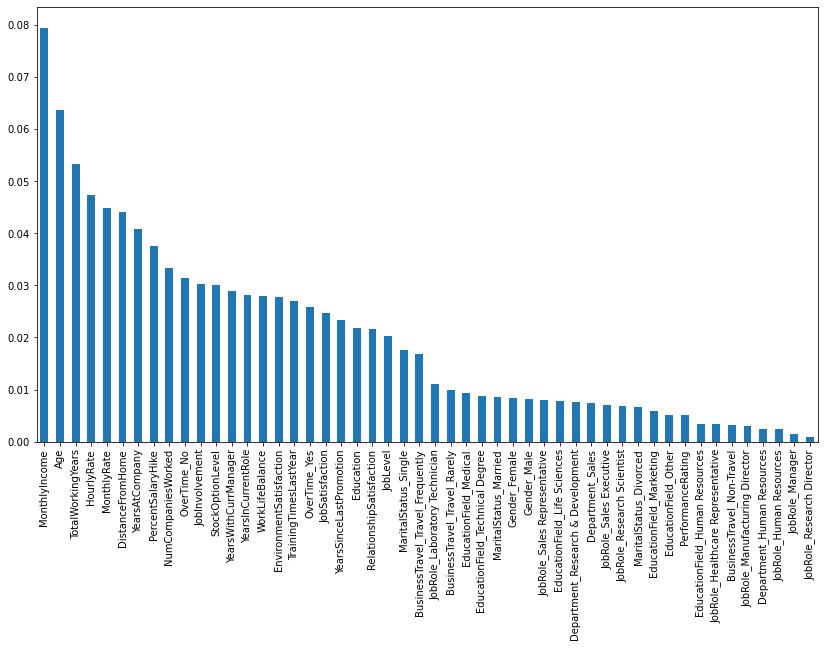

In [48]:
pd.Series(
    rf_clf.feature_importances_, 
    index=X_train.columns).sort_values(ascending=False).plot(kind='bar', figsize=(14,8))

## AdaBoost

In [49]:
from sklearn.ensemble import AdaBoostClassifier

In [50]:
a_clf = AdaBoostClassifier()
a_clf.fit(X_train, y_train.ravel())

AdaBoostClassifier()

In [51]:
scores(a_clf, X_train, y_train, X_test, y_test, train=True)
scores(a_clf, X_train, y_train, X_test, y_test, train=False)


***************************** Training ****************************************************
Accuracy:		 0.8947368421052632 

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       918
           1       0.84      0.46      0.59       184

    accuracy                           0.89      1102
   macro avg       0.87      0.72      0.77      1102
weighted avg       0.89      0.89      0.88      1102

Confusion Matrix:
 [[902  16]
 [100  84]]
******Cross Validation Number: 2
Avg accuracy: 0.8384754990925589
Accuracy standard dev: 0.0036297640653357166

***************************** Testing ****************************************************
Accuracy:		 0.9021739130434783
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       315
           1       0.79      0.43      0.56        53

    accuracy                           0.90       368
   ma

## Ada and RandomForest

In [52]:
ada_clf2 = AdaBoostClassifier(RandomForestClassifier())
ada_clf2.fit(X_train, y_train.ravel())

AdaBoostClassifier(base_estimator=RandomForestClassifier())

In [53]:
scores(ada_clf2, X_train, y_train, X_test, y_test, train=True)
scores(ada_clf2, X_train, y_train, X_test, y_test, train=False)


***************************** Training ****************************************************
Accuracy:		 1.0 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       918
           1       1.00      1.00      1.00       184

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102

Confusion Matrix:
 [[918   0]
 [  0 184]]
******Cross Validation Number: 2
Avg accuracy: 0.8502722323049002
Accuracy standard dev: 0.009981851179673318

***************************** Testing ****************************************************
Accuracy:		 0.875
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       315
           1       0.77      0.19      0.30        53

    accuracy                           0.88       368
   macro avg       0.82      0.59 

***

## Gradient Boosting Classifier

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

In [55]:
g_clf = GradientBoostingClassifier()
g_clf.fit(X_train, y_train.ravel())

GradientBoostingClassifier()

In [56]:
scores(g_clf, X_train, y_train, X_test, y_test, train=True)
scores(g_clf, X_train, y_train, X_test, y_test, train=False)


***************************** Training ****************************************************
Accuracy:		 0.9519056261343013 

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       918
           1       0.99      0.72      0.83       184

    accuracy                           0.95      1102
   macro avg       0.97      0.86      0.90      1102
weighted avg       0.95      0.95      0.95      1102

Confusion Matrix:
 [[917   1]
 [ 52 132]]
******Cross Validation Number: 2
Avg accuracy: 0.8448275862068966
Accuracy standard dev: 0.006352087114337546

***************************** Testing ****************************************************
Accuracy:		 0.875
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       315
           1       0.65      0.28      0.39        53

    accuracy                           0.88       368
   macro avg       

## XGBoost

In [57]:
import xgboost as xgb

In [58]:
x_clf = xgb.XGBClassifier()
x_clf.fit(X_train, y_train.ravel())

[16:12:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\50687\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
scores(x_clf, X_train, y_train, X_test, y_test, train=True)
scores(x_clf, X_train, y_train, X_test, y_test, train=False)


***************************** Training ****************************************************
Accuracy:		 1.0 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       918
           1       1.00      1.00      1.00       184

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102

Confusion Matrix:
 [[918   0]
 [  0 184]]
******Cross Validation Number: 2
[16:12:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation m

C:\Users\50687\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\50687\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



 0.8430127041742287
Accuracy standard dev: 0.006352087114337546

***************************** Testing ****************************************************
Accuracy:		 0.8777173913043478
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       315
           1       0.65      0.32      0.43        53

    accuracy                           0.88       368
   macro avg       0.77      0.65      0.68       368
weighted avg       0.86      0.88      0.86       368

Confusion Matrix:
 [[306   9]
 [ 36  17]]


In [60]:
from sklearn import preprocessing
le = preprocessing.LabelBinarizer()

In [86]:
## check unbalance df

imbalancedf = round((df.Attrition.value_counts() / df.Attrition.count()) * 100)
imbalancedf

No     84.0
Yes    16.0
Name: Attrition, dtype: float64

## Model Stacking

### 1. Decision Tree

In [62]:
tree_clf3 = DecisionTreeClassifier()
tree_clf3.fit(X_train, y_train)

DecisionTreeClassifier()

In [63]:
scores(tree_clf3, X_train, y_train, X_test, y_test, train=True)
scores(tree_clf3, X_train, y_train, X_test, y_test, train=False)


***************************** Training ****************************************************
Accuracy:		 1.0 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       918
           1       1.00      1.00      1.00       184

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102

Confusion Matrix:
 [[918   0]
 [  0 184]]
******Cross Validation Number: 2
Avg accuracy: 0.7613430127041743
Accuracy standard dev: 0.000907441016333943

***************************** Testing ****************************************************
Accuracy:		 0.7581521739130435
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85       315
           1       0.25      0.34      0.29        53

    accuracy                           0.76       368
   macro avg       0.

### 2. Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf_clf3 = RandomForestClassifier()
rf_clf3.fit(X_train, y_train.ravel())

RandomForestClassifier()

In [66]:
scores(rf_clf3, X_train, y_train, X_test, y_test, train=True)
scores(rf_clf3, X_train, y_train, X_test, y_test, train=False)


***************************** Training ****************************************************
Accuracy:		 1.0 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       918
           1       1.00      1.00      1.00       184

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102

Confusion Matrix:
 [[918   0]
 [  0 184]]
******Cross Validation Number: 2
Avg accuracy: 0.8502722323049001
Accuracy standard dev: 0.004537205081669715

***************************** Testing ****************************************************
Accuracy:		 0.8777173913043478
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       315
           1       0.79      0.21      0.33        53

    accuracy                           0.88       368
   macro avg       0.

In [67]:
ensembles = pd.DataFrame()
ensembles['tree_clf3'] = pd.DataFrame(tree_clf3.predict_proba(X_train))[1]
ensembles['rf_clf3'] = pd.DataFrame(rf_clf3.predict_proba(X_train))[1]
ensembles = pd.concat([ensembles, pd.DataFrame(y_train).reset_index(drop=True)], axis=1)
ensembles.rename({0: 'ind'}, axis=1, inplace=True)

In [68]:
ensembles.head()

,tree_clf3,rf_clf3,ind
0,0.0,0.02,0
1,0.0,0.03,0
2,0.0,0.06,0
3,0.0,0.06,0
4,0.0,0.05,0


## Meta Classifier
Ensemble different classifiers (LogisticRegression)

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
lr_clf = LogisticRegression(fit_intercept=False)

In [71]:
lr_clf.fit(ensembles[['tree_clf3', 'rf_clf3']], ensembles['ind'])

LogisticRegression(fit_intercept=False)

In [72]:
ensembles_test = pd.DataFrame()

In [73]:
ensembles_test['tree_clf3'] = pd.DataFrame(tree_clf3.predict_proba(X_test))[1]
ensembles_test['rf_clf3'] = pd.DataFrame(rf_clf3.predict_proba(X_test))[1]
ensembles_test['combined'] = lr_clf.predict(ensembles_test[['tree_clf3', 'rf_clf3']])
ensembles_test = pd.concat([ensembles_test, pd.DataFrame(y_test).reset_index(drop=True)], axis=1)
ensembles_test.rename({0: 'ind'}, axis=1, inplace=True)

In [75]:
pd.crosstab(ensembles_test['ind'], ensembles_test['combined'])

combined,0,1
ind,,
0,261,54
1,35,18


In [77]:
print(accuracy_score(ensembles_test['ind'], ensembles_test['combined']))

0.7581521739130435


In [78]:
print(classification_report(ensembles_test['ind'], ensembles_test['combined']))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       315
           1       0.25      0.34      0.29        53

    accuracy                           0.76       368
   macro avg       0.57      0.58      0.57       368
weighted avg       0.79      0.76      0.77       368



Unique classifier

In [83]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

In [89]:
imbalancedf

No     84.0
Yes    16.0
Name: Attrition, dtype: float64

In [103]:
weigth = {0:imbalancedf[0], 1:imbalancedf[1]}
weigth

{0: 84.0, 1: 16.0}

In [101]:
pd.Series(list(y_train.ravel())).value_counts() / pd.Series(list(y_train.ravel())).count()

0    0.833031
1    0.166969
dtype: float64

In [105]:
rf_clf4 = RandomForestClassifier(class_weight=weigth)
ada4 = AdaBoostClassifier(
    base_estimator=rf_clf4, 
    n_estimators=1000, 
    learning_rate=0.5, random_state=42)

In [106]:
ada4.fit(X_train, y_train.ravel())

AdaBoostClassifier(base_estimator=RandomForestClassifier(class_weight={0: 84.0,
                                                                       1: 16.0}),
                   learning_rate=0.5, n_estimators=1000, random_state=42)

In [107]:
scores(ada4, X_train, y_train, X_test, y_test, train=True)
scores(ada4, X_train, y_train, X_test, y_test, train=False)


***************************** Training ****************************************************
Accuracy:		 1.0 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       918
           1       1.00      1.00      1.00       184

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102

Confusion Matrix:
 [[918   0]
 [  0 184]]
******Cross Validation Number: 2
Avg accuracy: 0.8548094373865699
Accuracy standard dev: 0.001814882032667886

***************************** Testing ****************************************************
Accuracy:		 0.875
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       315
           1       0.73      0.21      0.32        53

    accuracy                           0.88       368
   macro avg       0.81      0.60 

In [108]:
bag_clf4 = BaggingClassifier(base_estimator=ada4,
            n_estimators=50,
            max_samples=1,
            max_features=1,
            bootstrap=True,
            bootstrap_features=False,
            n_jobs=-1,
            random_state=42)

In [109]:
bag_clf4.fit(X_train, y_train.ravel())

BaggingClassifier(base_estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier(class_weight={0: 84.0,
                                                                                                        1: 16.0}),
                                                    learning_rate=0.5,
                                                    n_estimators=1000,
                                                    random_state=42),
                  max_features=1, max_samples=1, n_estimators=50, n_jobs=-1,
                  random_state=42)

In [110]:
scores(bag_clf4, X_train, y_train, X_test, y_test, train=True)
scores(bag_clf4, X_train, y_train, X_test, y_test, train=False)


***************************** Training ****************************************************
Accuracy:		 0.8330308529945554 



C:\Users\50687\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\50687\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\50687\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       918
           1       0.00      0.00      0.00       184

    accuracy                           0.83      1102
   macro avg       0.42      0.50      0.45      1102
weighted avg       0.69      0.83      0.76      1102

Confusion Matrix:
 [[918   0]
 [184   0]]
******Cross Validation Number: 2
Avg accuracy: 0.8330308529945554
Accuracy standard dev: 0.0

***************************** Testing ****************************************************
Accuracy:		 0.8559782608695652


C:\Users\50687\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\50687\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\50687\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       315
           1       0.00      0.00      0.00        53

    accuracy                           0.86       368
   macro avg       0.43      0.50      0.46       368
weighted avg       0.73      0.86      0.79       368

Confusion Matrix:
 [[315   0]
 [ 53   0]]
